# EDA
We will make the EDA analysis to understand are the connection between different categories.



In [20]:
# Setting up different attributes if we had it like False, the code will not be running
notebook_setup = False

### Importing the modules

In [35]:
import pandas as pd

# charts
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import curdoc

# brief visualizations
from autoviz.AutoViz_Class import AutoViz_Class

# functions that allows our personalize functions
from helpers.helper_functions import split_dataset

# colors 
We set up the colors

In [22]:
custom_colors = ['#36CE8A', "#7436F5", "#3736F4", "#36AEF5", "#B336F5", "#f8165e", "#36709A",  "#3672F5", "#7ACE5D"]
color_palette_custom  = sns.set_palette(custom_colors)
theme_color = sns.color_palette(color_palette_custom, 9)

# applying bokeh theme
curdoc().theme = "dark_minimal"

theme_color

[(0.21176470588235294, 0.807843137254902, 0.5411764705882353),
 (0.4549019607843137, 0.21176470588235294, 0.9607843137254902),
 (0.21568627450980393, 0.21176470588235294, 0.9568627450980393),
 (0.21176470588235294, 0.6823529411764706, 0.9607843137254902),
 (0.7019607843137254, 0.21176470588235294, 0.9607843137254902),
 (0.9725490196078431, 0.08627450980392157, 0.3686274509803922),
 (0.21176470588235294, 0.4392156862745098, 0.6039215686274509),
 (0.21176470588235294, 0.4470588235294118, 0.9607843137254902),
 (0.47843137254901963, 0.807843137254902, 0.36470588235294116)]

# Analyzing the parameters

The first thing we will be trying to do it's to understand how are the different features we had in this dataset

Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

I will add a small explanation for BMI, AVG glucose levels, hypertension and heart disease, so we can understand this concepts really well.

##### BMI (Body Mass Index):
A measure of body fat based on height and weight.
BMI helps categorize individuals into different weight status categories such as underweight, normal weight, overweight, and obese, which can indicate potential health risks.
best levels are in between 18.5 and 24.9

##### AVG glucose levels
The average concentration of glucose (sugar) in the blood over a period, typically measured in milligrams per deciliter (mg/dL).
best levels are in between 70 and 100

##### Hypertension 
A chronic medical condition where the blood pressure in the arteries is persistently elevated, often defined as a systolic blood pressure above 130 mmHg or a diastolic blood pressure above 80 mmHg.

##### Heart disease
A range of conditions affecting the heart, including coronary artery disease, arrhythmias, heart failure, and others.

Then we want to understand what it's a stroke

##### stroke
A medical condition that occurs when the blood supply to part of the brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients.

Probably we could try to add a new categories to see if the person its underweight, normal weight, overweight, and obese and see if this helps to improve the models


In [23]:
# Load your dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

id    gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0        0             1            Yes       
1  51676  Female  61.0        0             0            Yes       
2  31112    Male  80.0        0             1            Yes       
3  60182  Female  49.0        0             0            Yes       
4   1665  Female  79.0        1             0            Yes       

    work_type    Residence_type  avg_glucose_level   bmi  smoking_status   \
0        Private      Urban           228.69        36.6  formerly smoked   
1  Self-employed      Rural           202.21         NaN     never smoked   
2        Private      Rural           105.92        32.5     never smoked   
3        Private      Urban           171.23        34.4           smokes   
4  Self-employed      Rural           174.12        24.0     never smoked   

   stroke  
0     1    
1     1    
2     1    
3     1    
4     1

# Duplicated
We will be verifying if we had some duplicated values if any occurrence we will be discarding the

In [24]:
df_no_duplicated = df.duplicated(subset=["id"], keep=False).shape
df_no_duplicated[0] == df.shape[0]

True

We can see that the IDs are the same, so we can assume that we don't had any duplicated

# Split
split the datasets, between th requirements for the training model, in this case we will have 85% of the data for training purposes, and we will be validating them with just small percent of the cases, over 350 cases for validation and testing, we are doing this, because we want to have enough amount of information so the model prepares correctly

In [25]:
independent_var = df.iloc[:,1:11]
dependent_var = df.iloc[:,11:]

In [26]:
X_train, X_validation, X_test, y_train, y_validation, y_test = split_dataset(
    dependent_variable= dependent_var,
    independent_variable= independent_var,
    split_train_validation = 0.15,
    split_validation_test = 0.5, 
    state_reproducibility = 100
)

In [27]:
train_data = pd.concat([X_train, y_train], axis = 1)
train_data.head(5)

gender   age  hypertension  heart_disease ever_married work_type  \
750     Male   2.0        0             0             No      children   
2561  Female  63.0        0             0            Yes       Private   
2790    Male  10.0        0             0             No      children   
2929    Male   4.0        0             0             No      children   
1694  Female  44.0        0             0            Yes      Govt_job   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
750       Rural            73.62        20.8       Unknown      0    
2561      Rural            78.96        28.6  never smoked      0    
2790      Rural            68.94        18.0       Unknown      0    
2929      Urban           103.34        18.8       Unknown      0    
1694      Urban            67.06        35.5  never smoked      0

Shape of your Data Set loaded: (4343, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variabl

Number of All Scatter Plots = 6


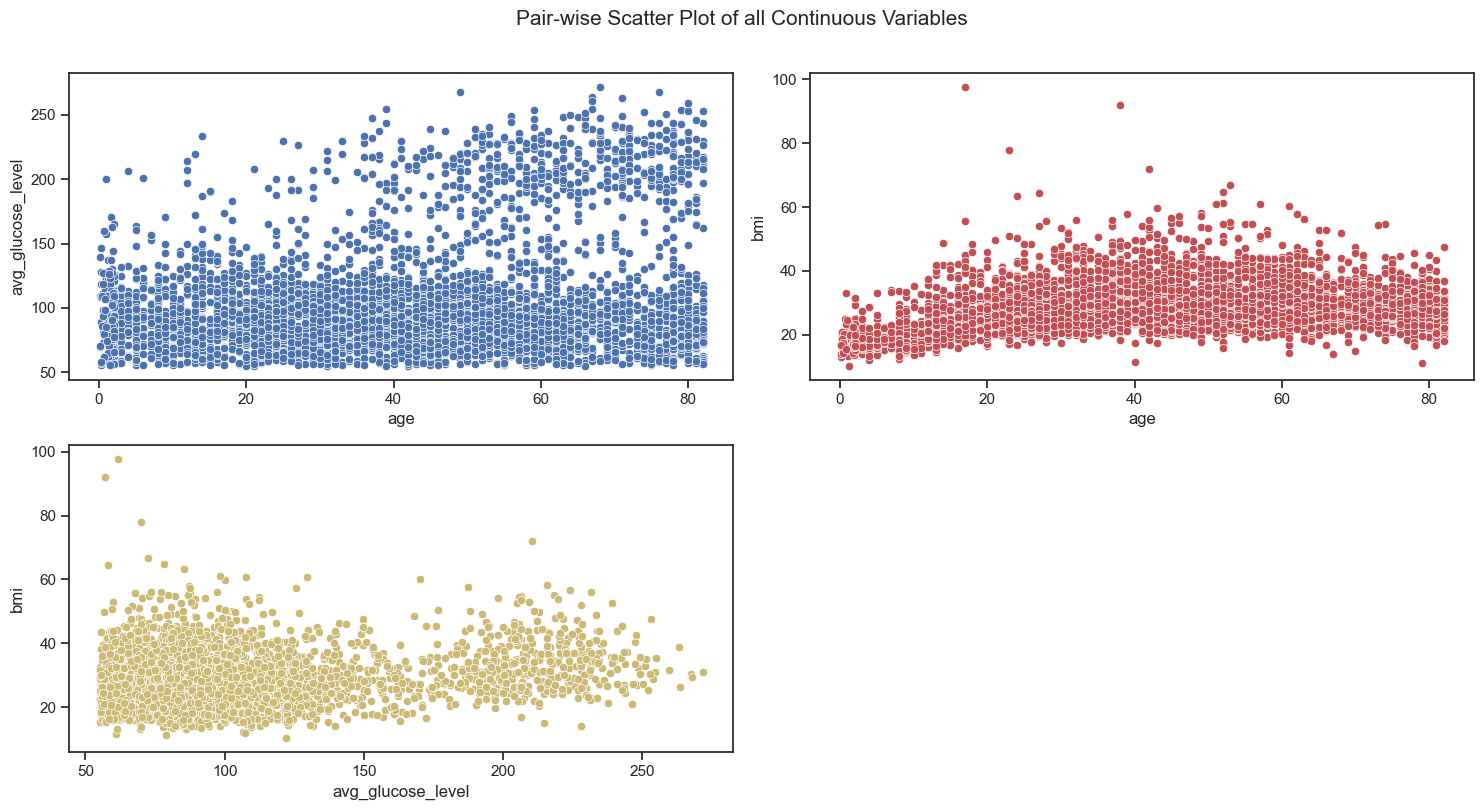

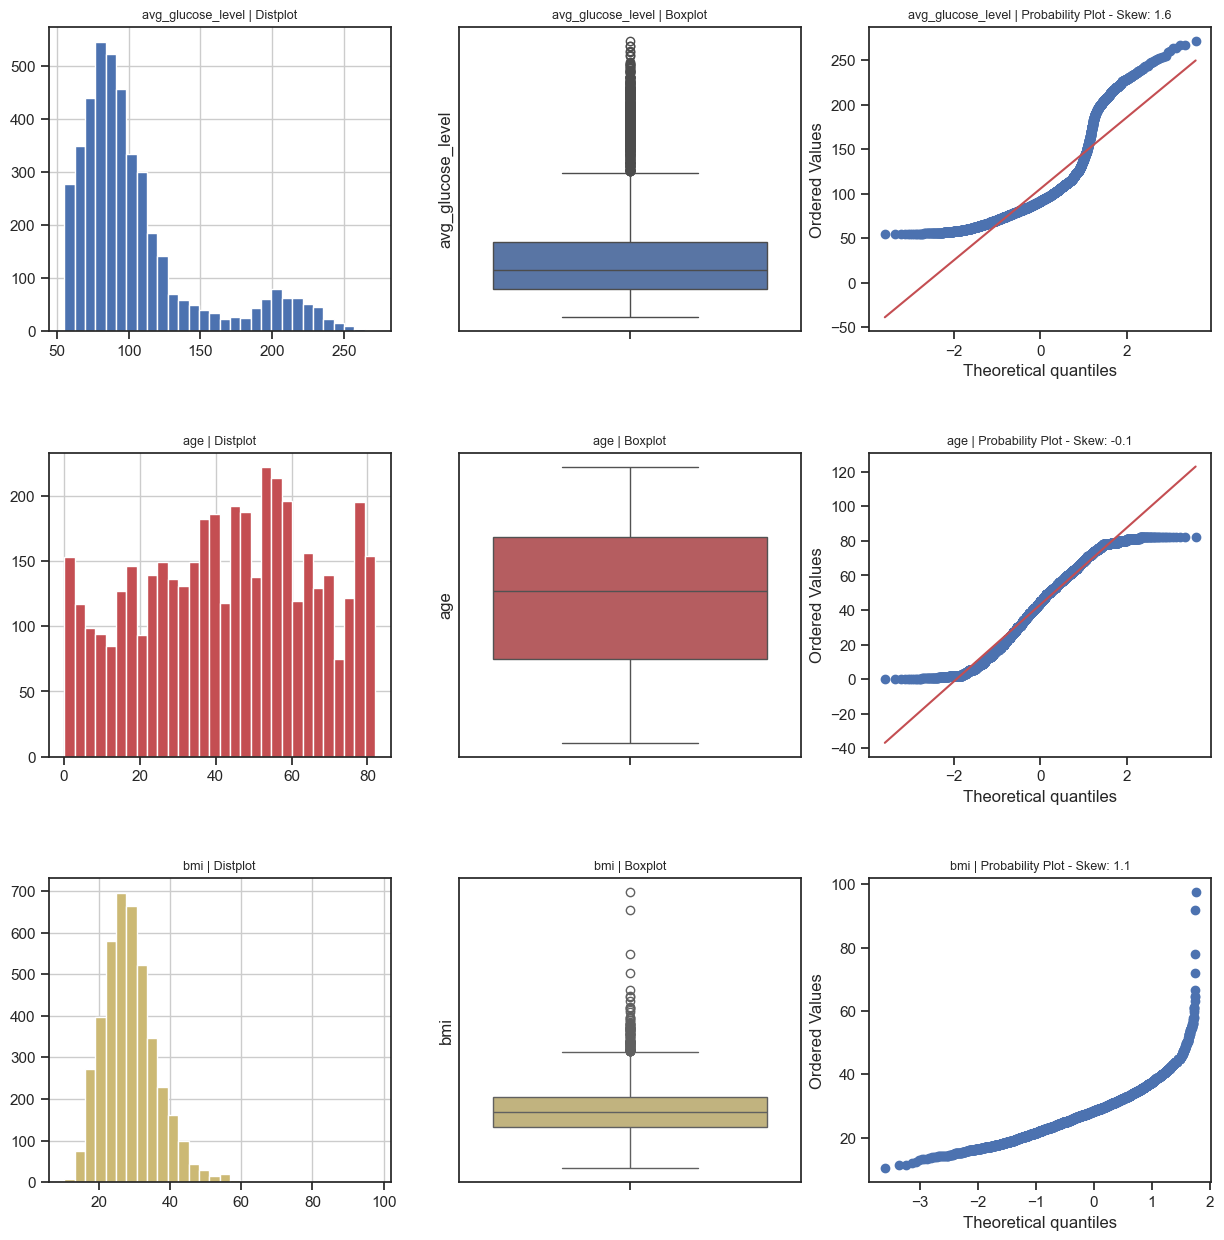

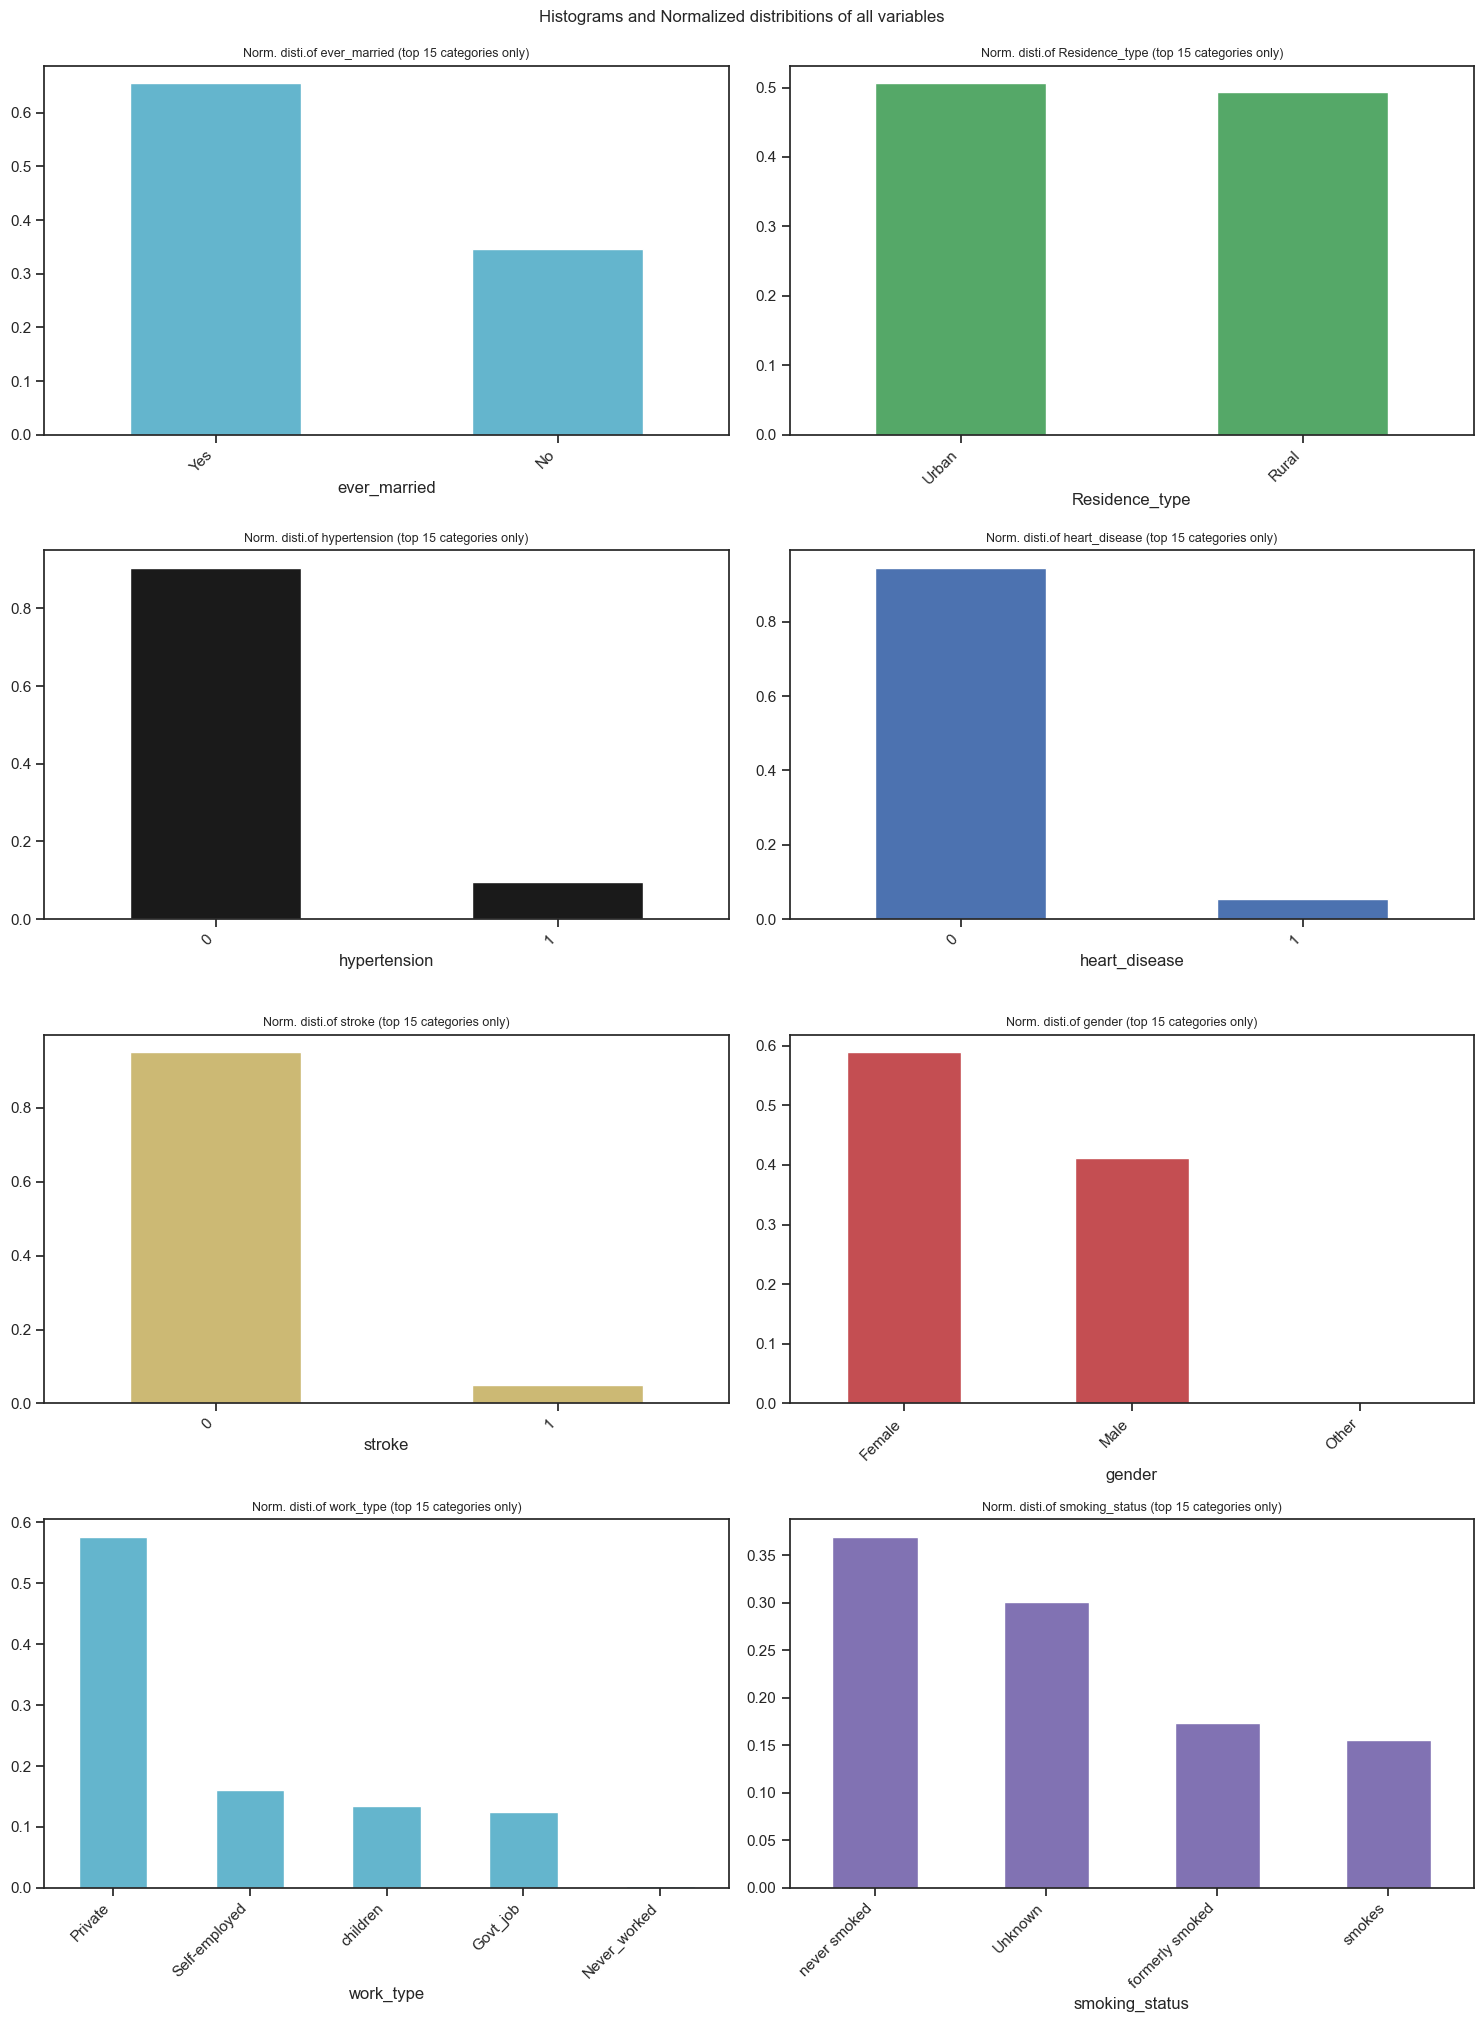

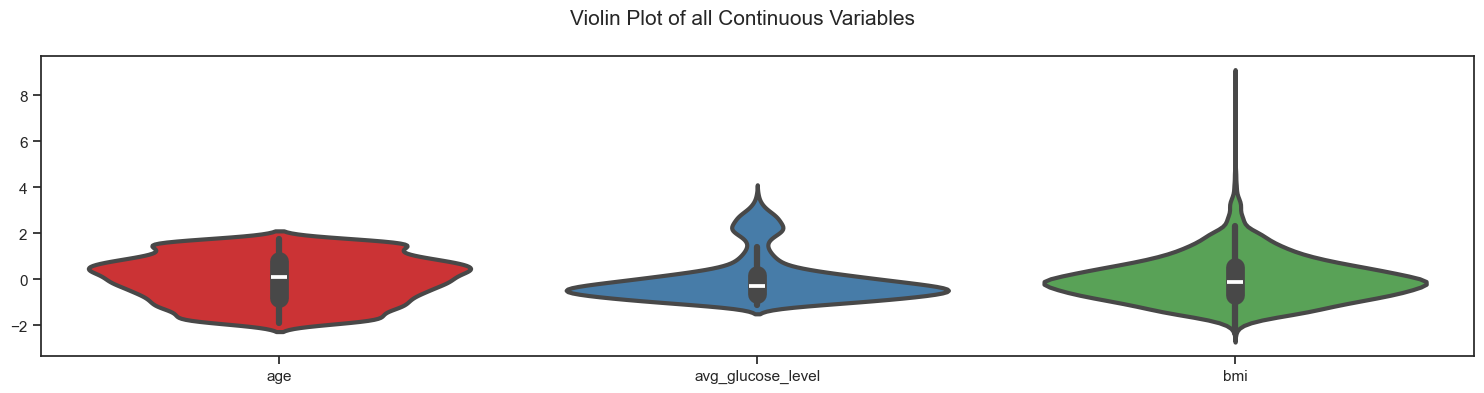

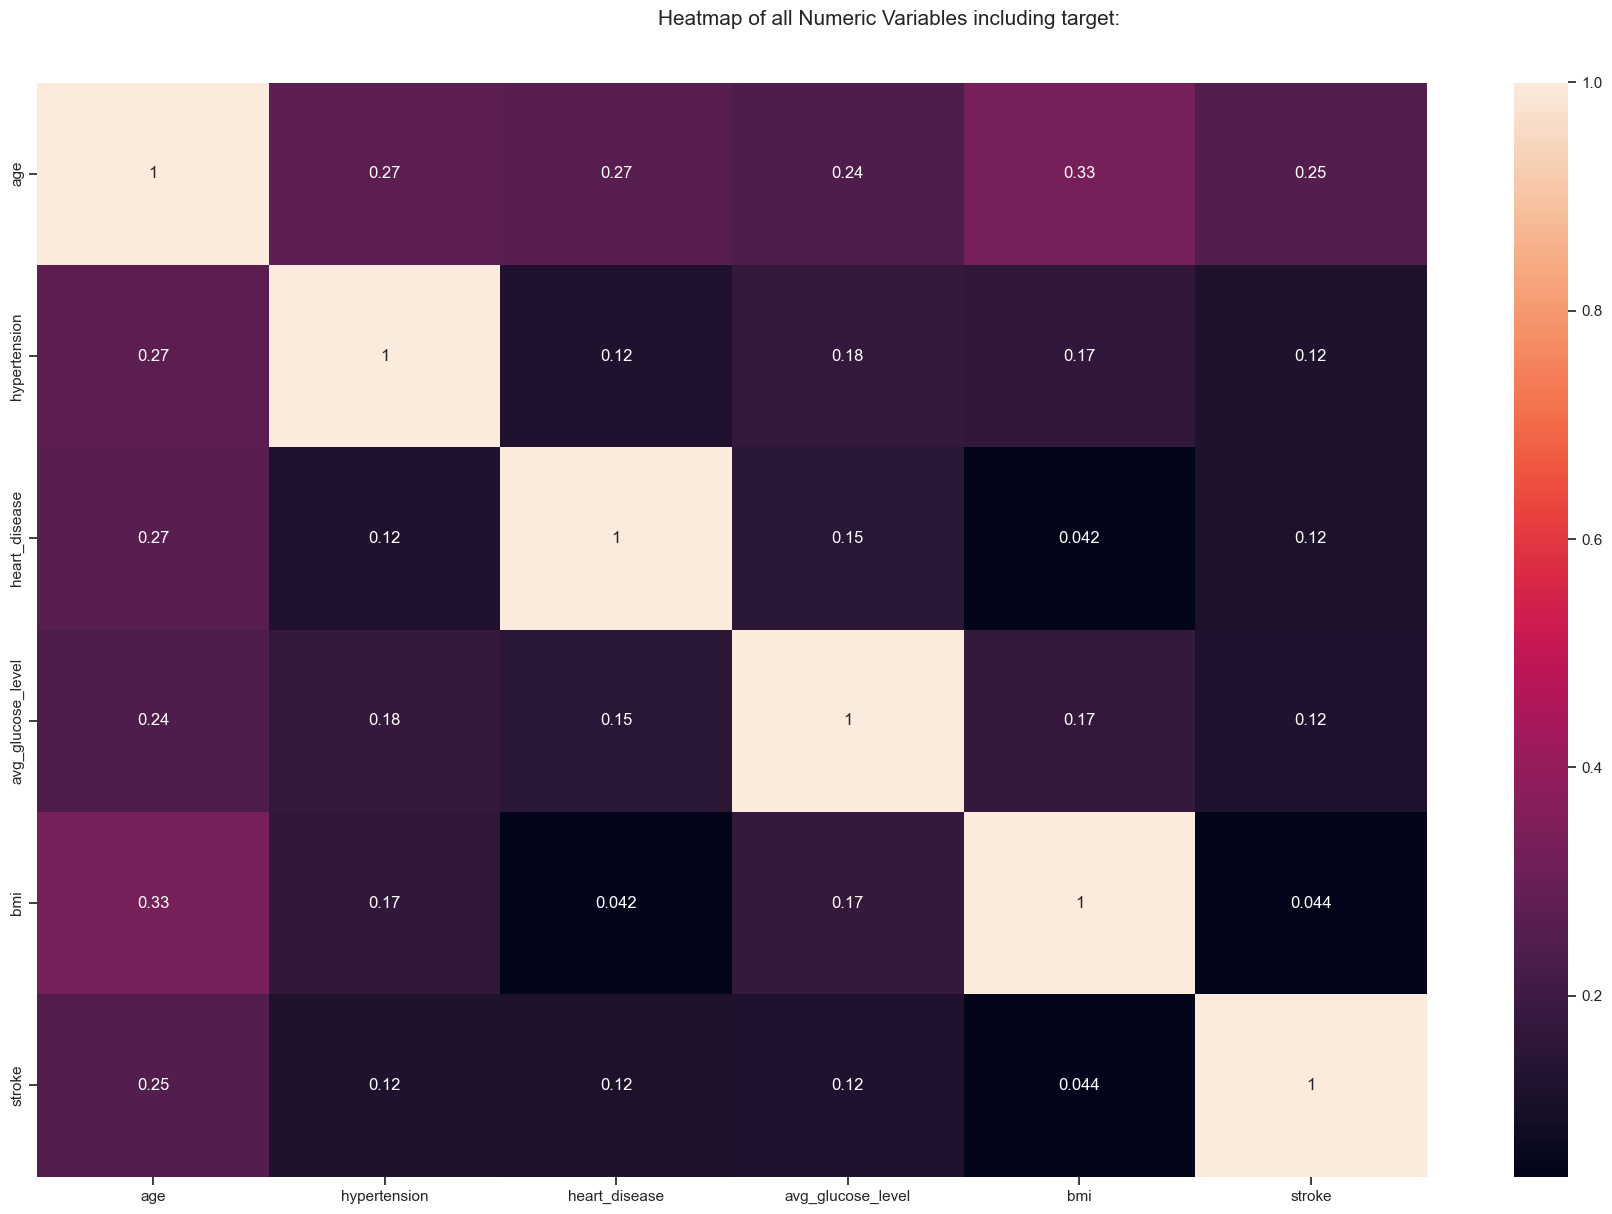

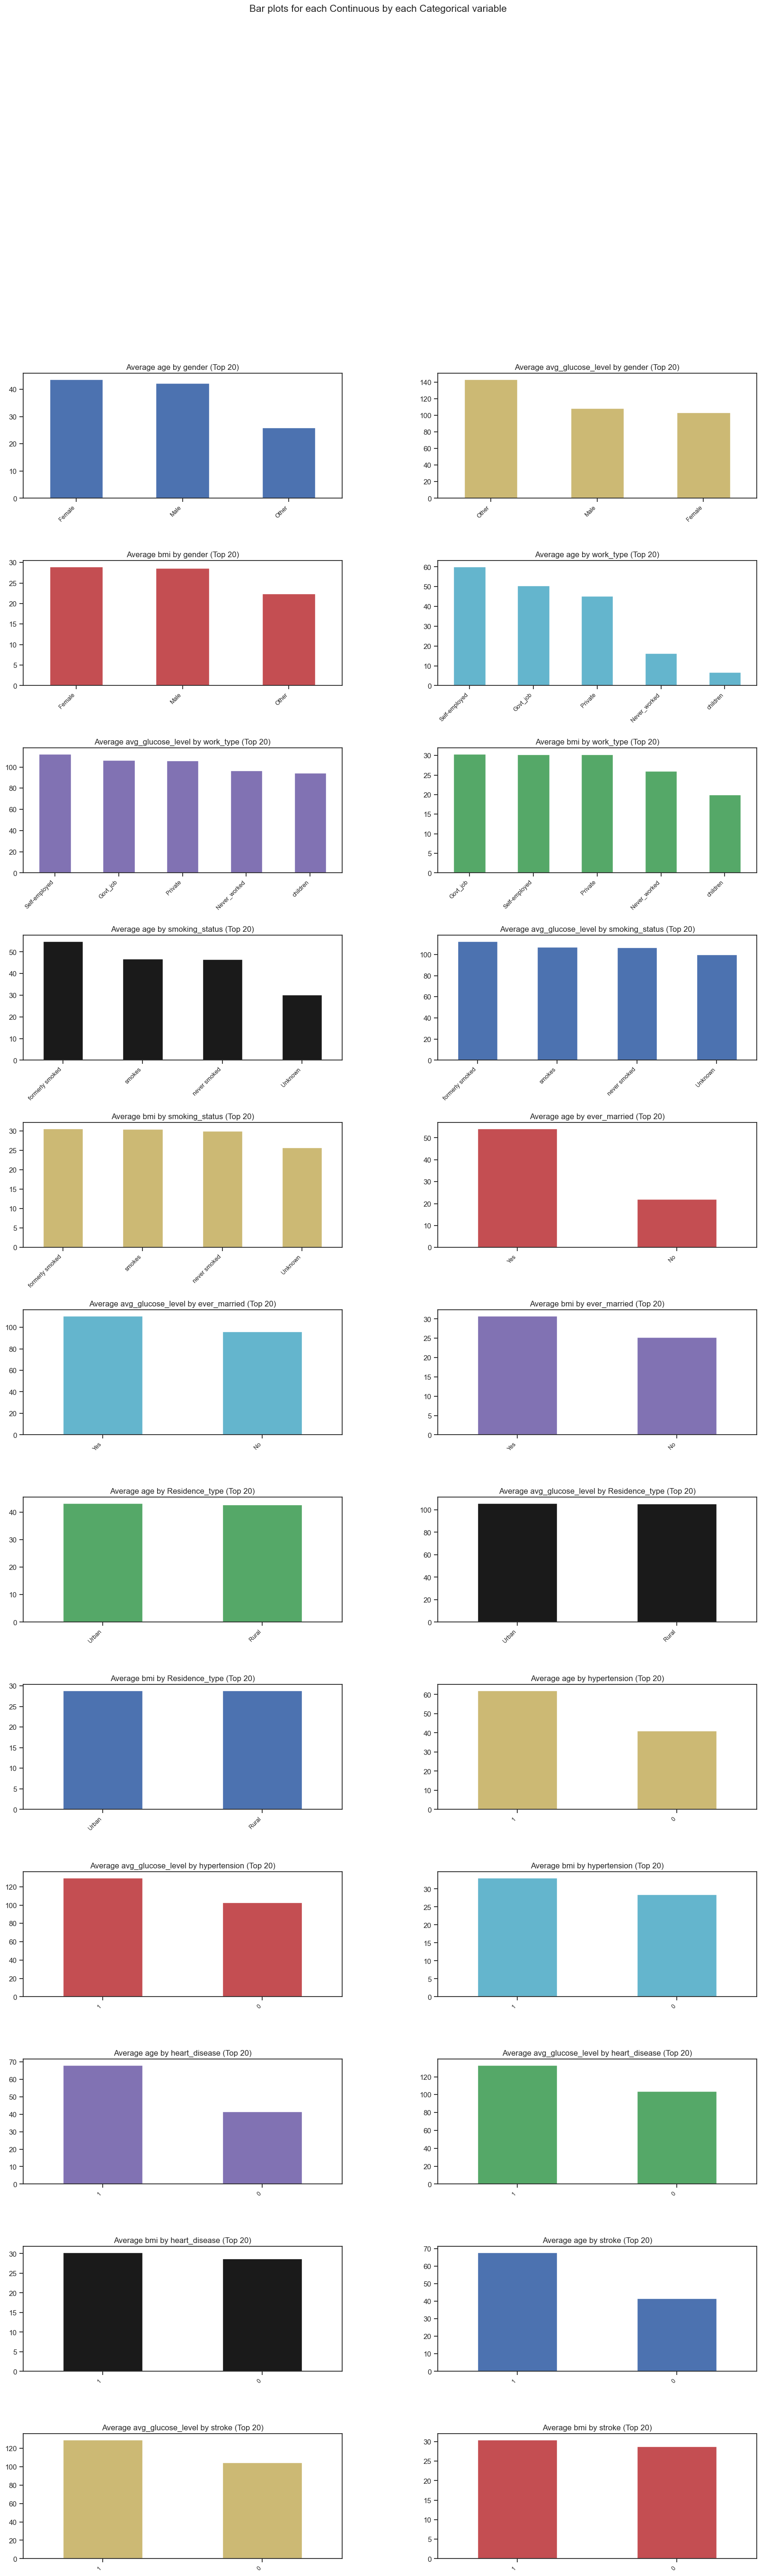

All Plots done
Time to run AutoViz = 6 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


gender   age  hypertension  heart_disease ever_married   work_type     \
750     Male   2.0        0             0             No           children   
2561  Female  63.0        0             0            Yes            Private   
2790    Male  10.0        0             0             No           children   
2929    Male   4.0        0             0             No           children   
1694  Female  44.0        0             0            Yes           Govt_job   
...      ...   ...           ...            ...          ...            ...   
4149  Female  81.0        1             1            Yes      Self-employed   
1890  Female  44.0        0             0            Yes           Govt_job   
350   Female  79.0        1             1            Yes      Self-employed   
79      Male  43.0        0             0            Yes      Self-employed   
3927  Female  62.0        0             0            Yes            Private   

     Residence_type  avg_glucose_level   bmi  smoking_status   stroke  
750       Rural            73.62        20.8          Unknown     0    
2561      Rural            78.96        28.6     never smoked     0    
2790      Rural            68.94        18.0          Unknown     0    
2929      Urban           103.34        18.8          Unknown     0    
1694      Urban            67.06        35.5     never smoked     0    
...             ...                ...   ...              ...     ...  
4149      Urban            59.11        20.7  formerly smoked     0    
1890      Urban            91.21        24.1     never smoked     0    
350       Urban           200.28        30.0  formerly smoked     0    
79        Urban           143.43        45.9          Unknown     1    
3927      Urban            88.32        36.3          Unknown     0    

[4343 rows x 11 columns]

In [28]:
AV = AutoViz_Class()
# Generate a report
AV.AutoViz(train_data)

# Missing values and rare conditions in the dataset
We can see several details in the EDA
- we could see some missing values in the BMI feature, for now we will be just adding the mean value to the computation, but probably for the implementation of the model we will be testing the KNN or a logistic regression, to predict the values and had a more accurate  behavior.
- Also, we could see some outliers in the glucose levels and in the bmi, this could be impactful when we need to prepare the models.
- In gender and work type we had had 1 rare categories we will take out this 2 rows so does not impact the model performance.

In [29]:
# filling the missing values
train_data["bmi"].fillna(train_data["bmi"].mean(), inplace = True)

# convert an objects features to text
train_data["gender"] = train_data["gender"].astype(str)
train_data["ever_married"] = train_data["ever_married"].astype(str)
train_data["work_type"] = train_data["work_type"].astype(str)
train_data["Residence_type"] = train_data["Residence_type"].astype(str)
train_data["smoking_status"] = train_data["smoking_status"].astype(str)

Now seems everything prepare, so we will be plotting the different charts to understand how everything it's connected to the target variable.

In [30]:
# this helps display the matplotlib file
%matplotlib inline

# select the target variable
target_variable = "stroke"

dft = AV.AutoViz(train_data, 
                 sep=",",
                 depVar=target_variable,
                 dfte="",
                 header=0, 
                 verbose=1,
                 lowess=False,
                 chart_format='bokeh',
                 max_rows_analyzed=150000,
                 max_cols_analyzed=30)

Shape of your Data Set loaded: (4343, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    10 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification problem #####################


Row
    [0] WidgetBox
        [0] Select(name='x', options=['stroke'], value='stroke')
        [1] Select(name='y', options=['age', 'avg_glucose_level...], value='age')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['age', 'avg_glucose_level...], value='age')
        [1] Select(name='Y-Axis', options=['age', 'avg_glucose_level...], value='avg_glucose_level')
        [2] Select(name='Color', options=['None', 'stroke'], value='None')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

Column
    [0] Row
        [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=600)
        [1] WidgetBox(align=('end', 'start'))
            [0] Select(options=['gender', 'work_type', ...], value='gender')

Column
    [0] Row
        [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=600)
        [1] WidgetBox(align=('end', 'start'))
            [0] Select(options=['avg_glucose_level', ...], value='avg_glucose_level')

KDE plot is erroring due to problems with DynamicMaps. Hence it is skipped


HoloViews(Layout)

No date vars could be found in data set


HoloViews(Overlay, height=500, sizing_mode='fixed', width=600)

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['gender', 'work_type', ...], value='gender')
        [1] Select(name='Y-Axis', options=['age', 'avg_glucose_level...], value='age')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

Time to run AutoViz (in seconds) = 5


Shape of your Data Set loaded: (4343, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variabl

Number of All Scatter Plots = 6


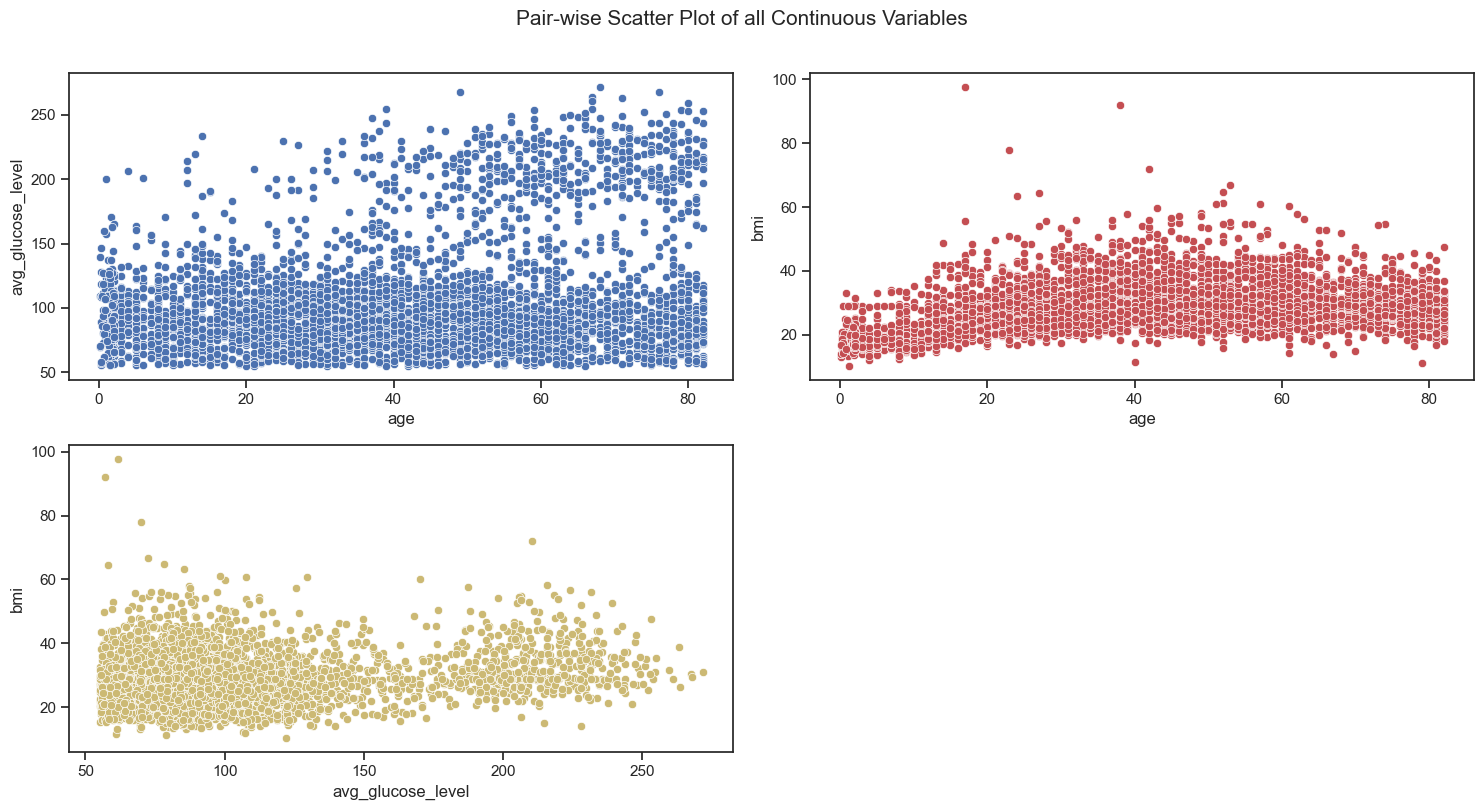

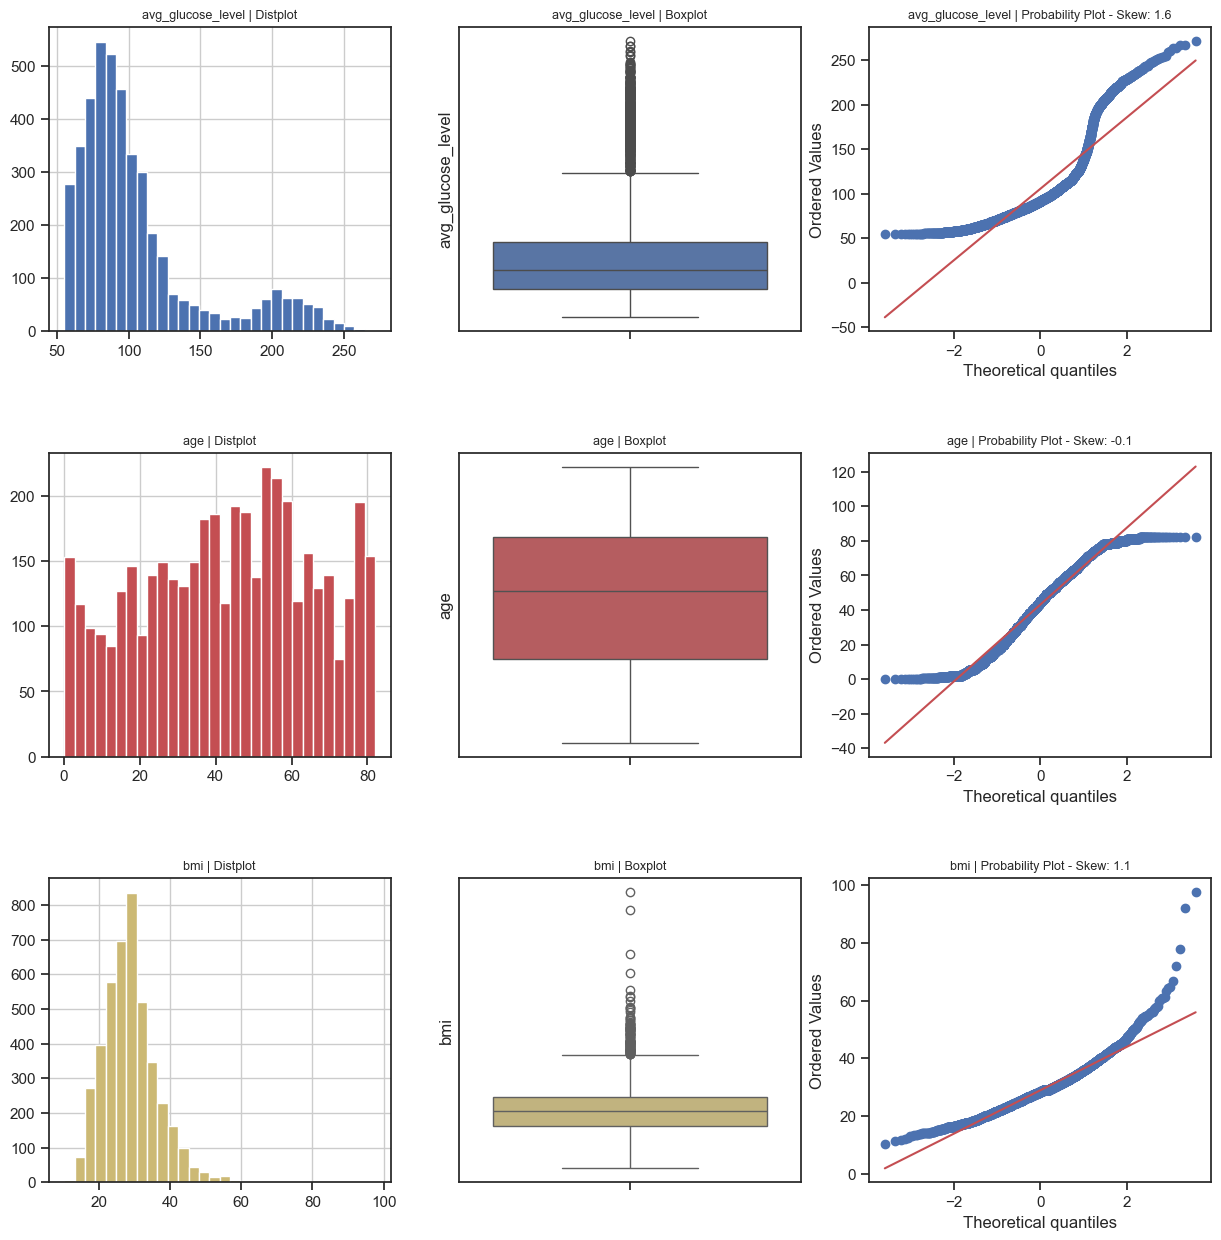

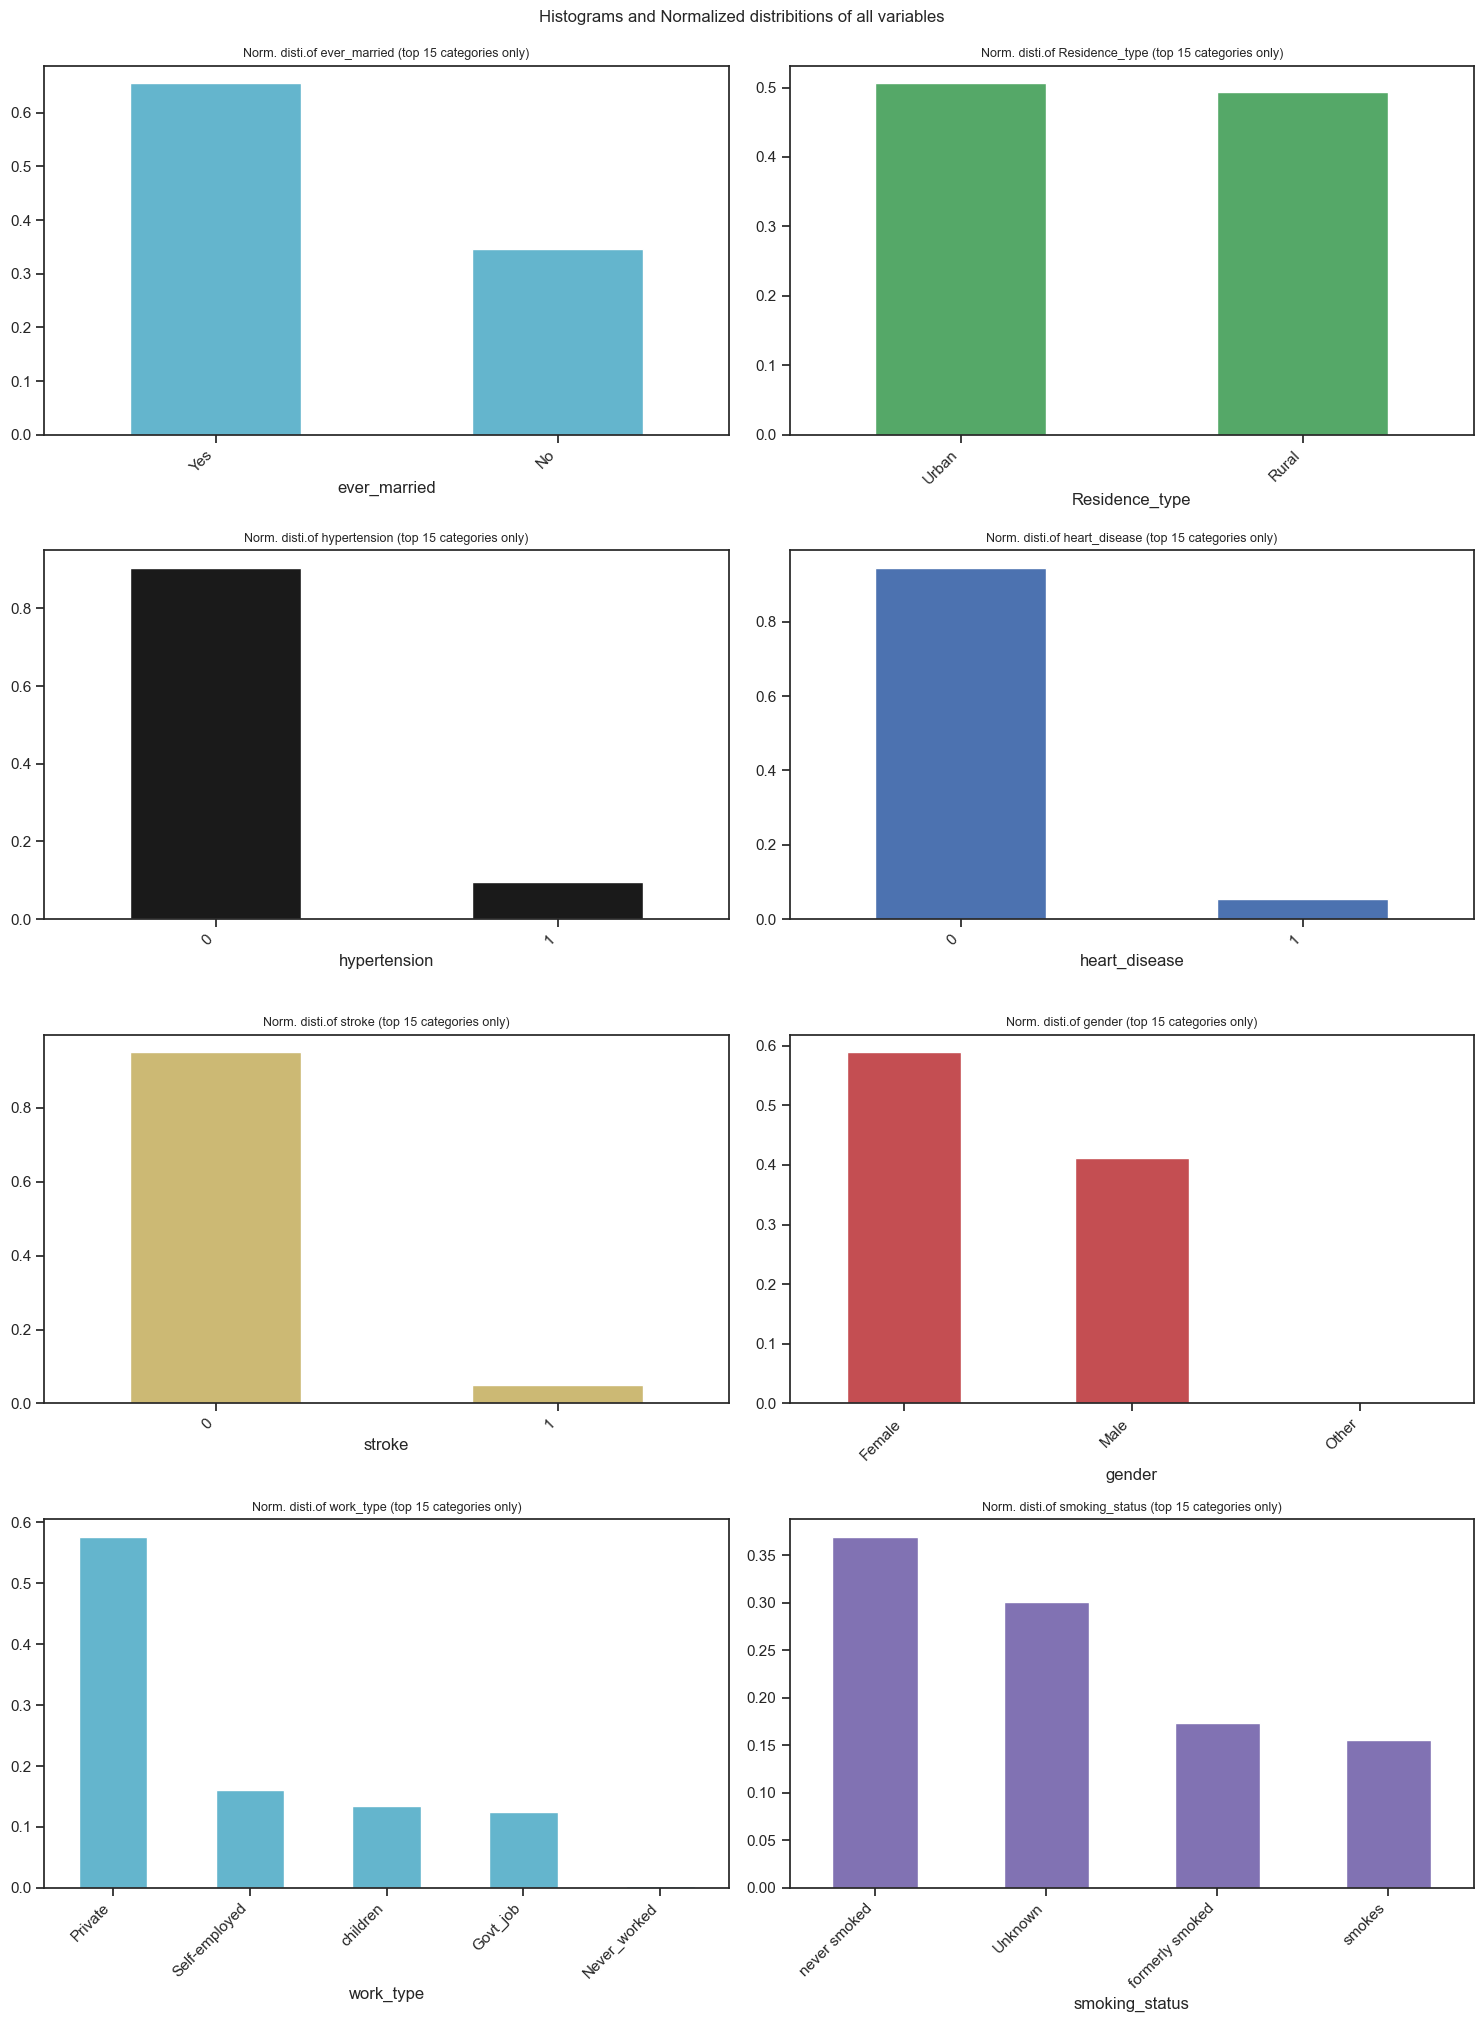

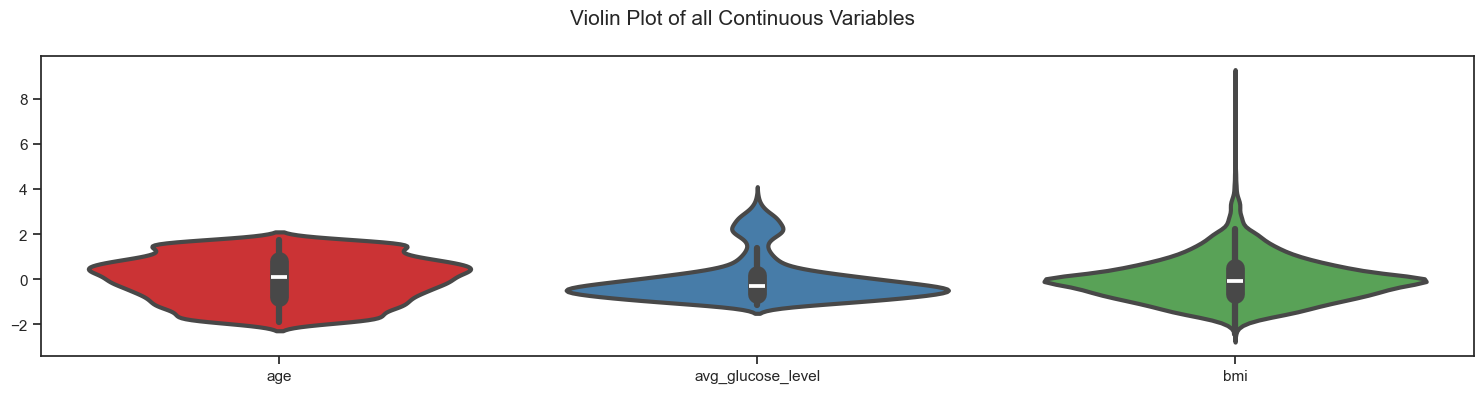

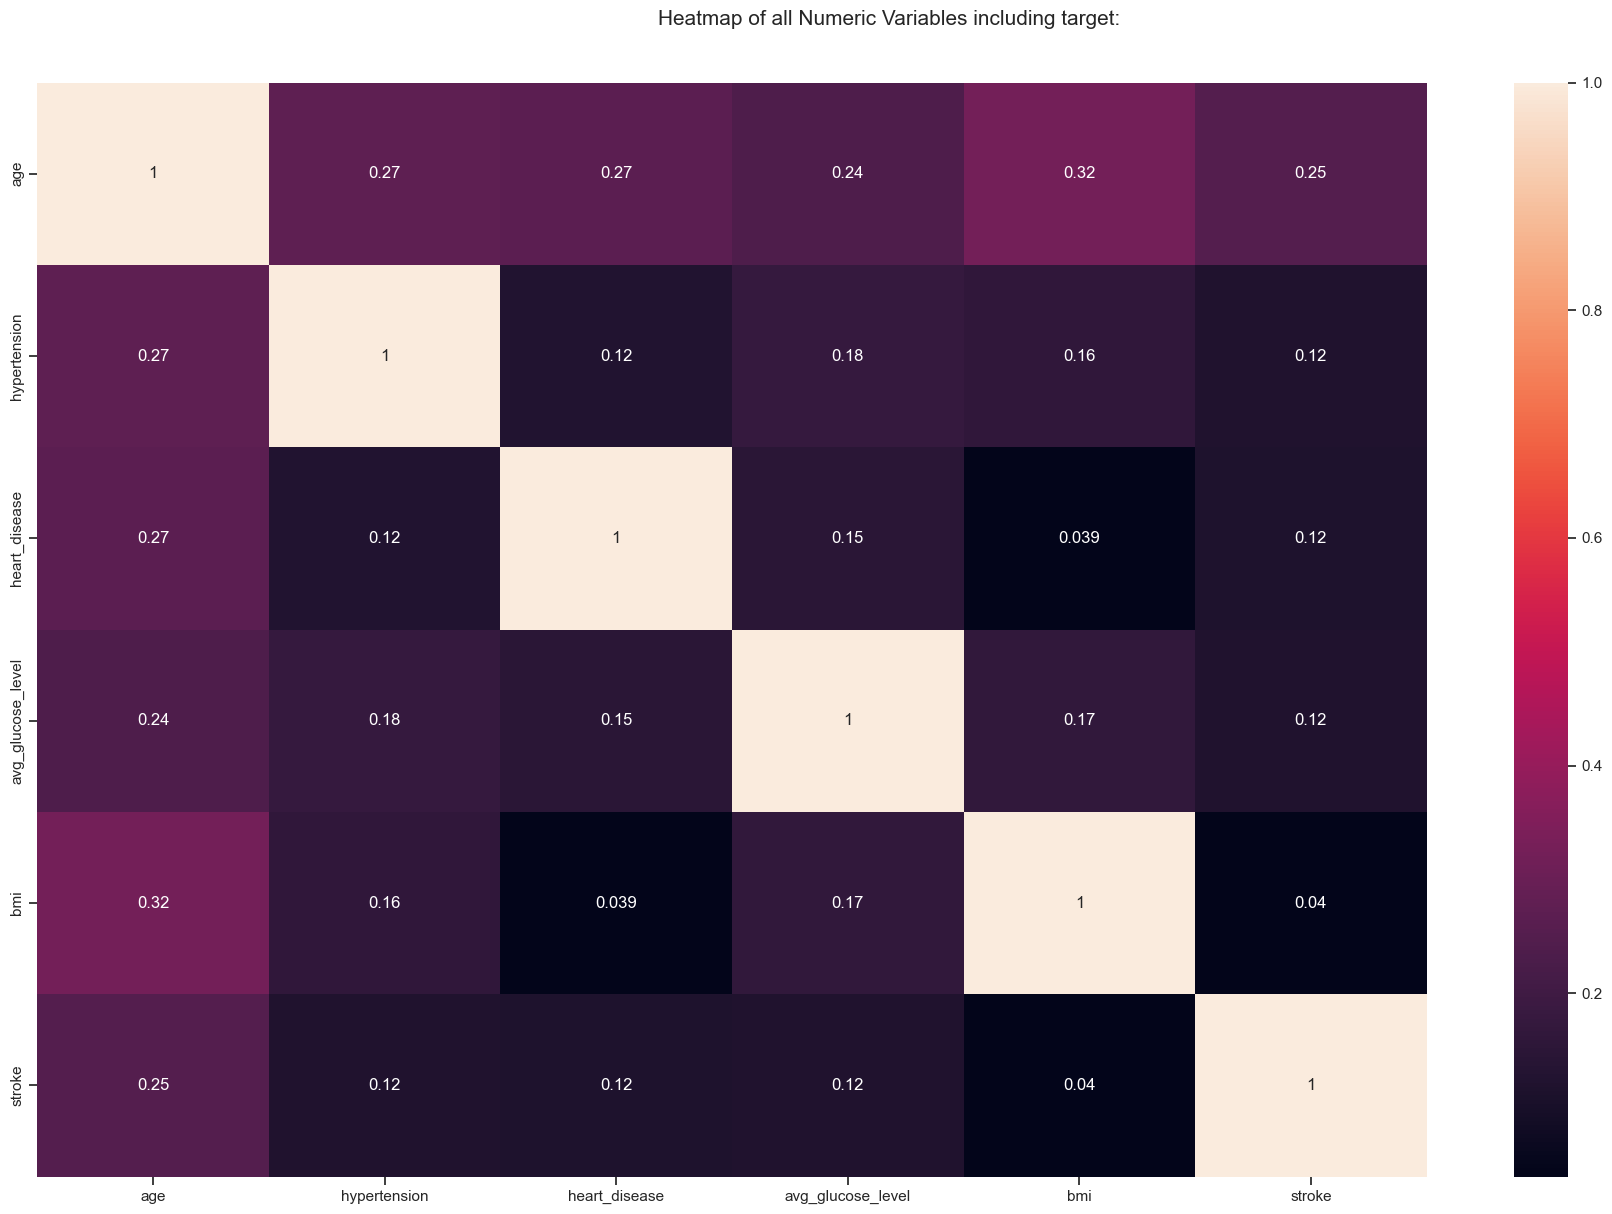

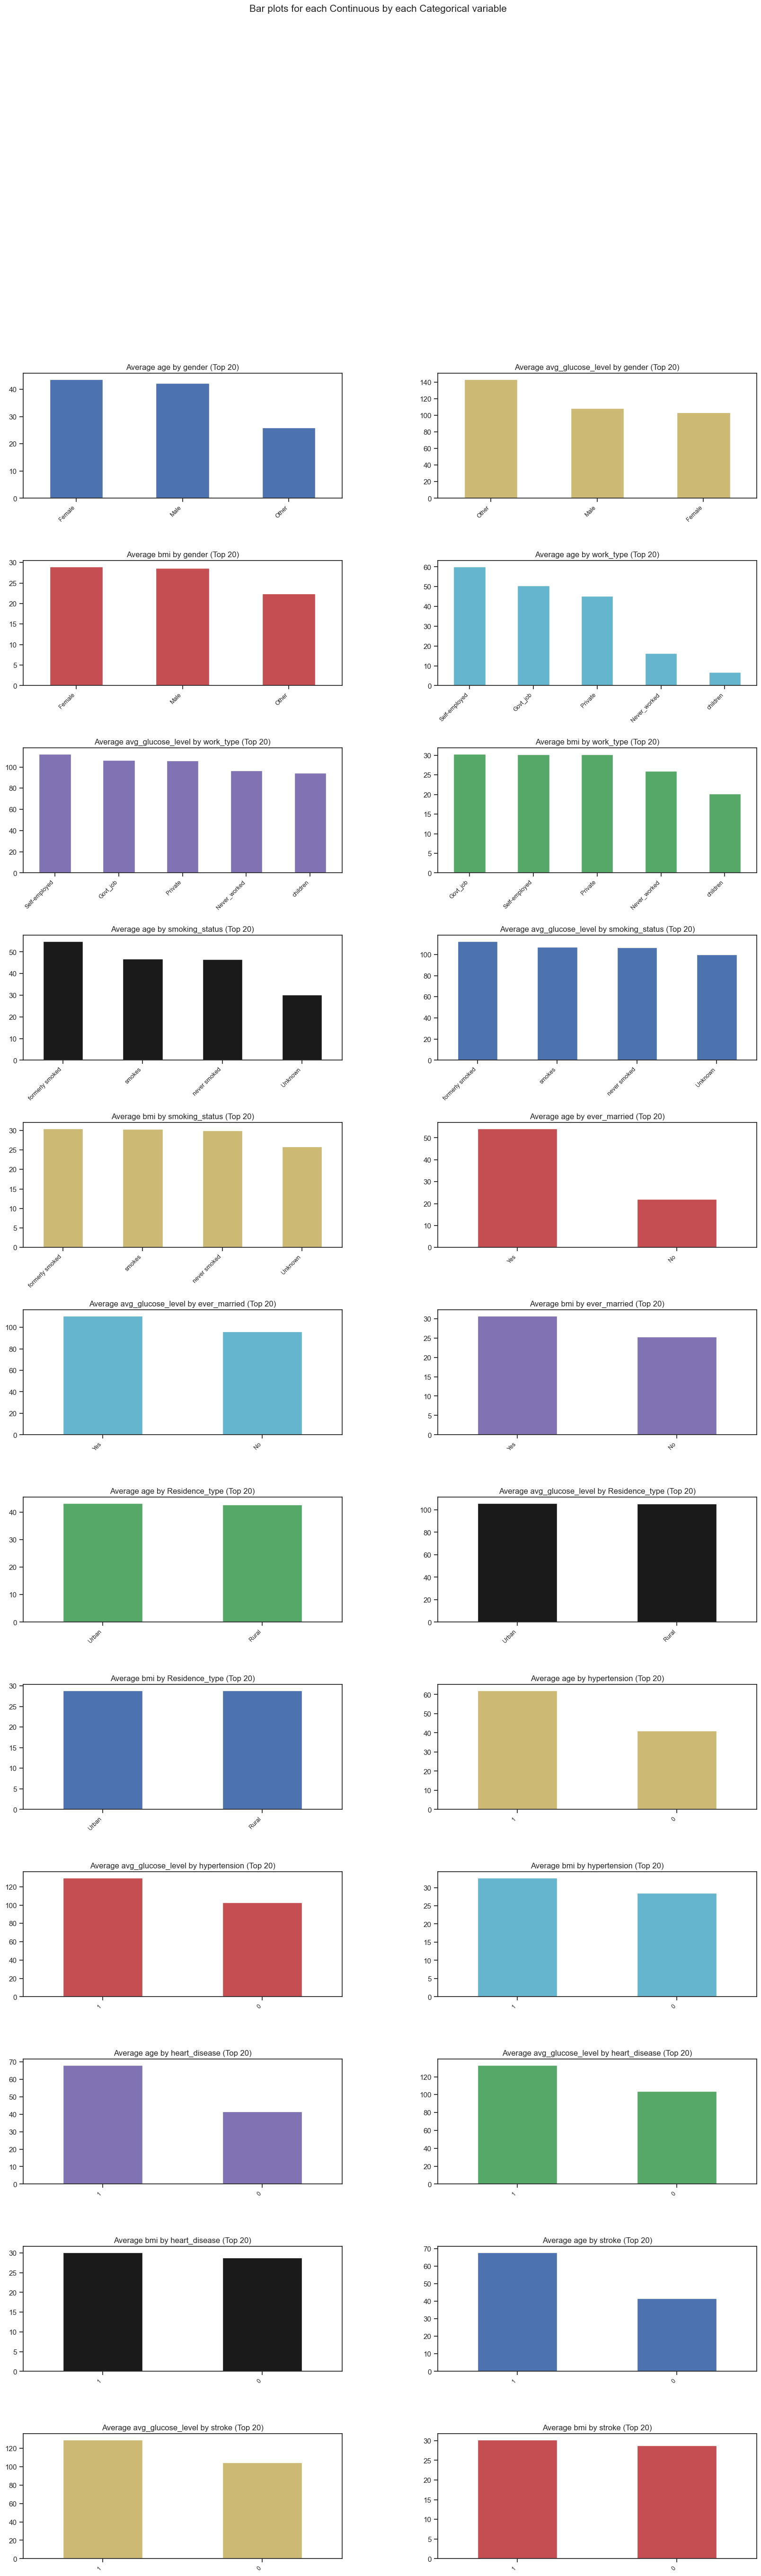

All Plots done
Time to run AutoViz = 6 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


gender   age  hypertension  heart_disease ever_married   work_type     \
750     Male   2.0        0             0             No           children   
2561  Female  63.0        0             0            Yes            Private   
2790    Male  10.0        0             0             No           children   
2929    Male   4.0        0             0             No           children   
1694  Female  44.0        0             0            Yes           Govt_job   
...      ...   ...           ...            ...          ...            ...   
4149  Female  81.0        1             1            Yes      Self-employed   
1890  Female  44.0        0             0            Yes           Govt_job   
350   Female  79.0        1             1            Yes      Self-employed   
79      Male  43.0        0             0            Yes      Self-employed   
3927  Female  62.0        0             0            Yes            Private   

     Residence_type  avg_glucose_level   bmi  smoking_status   stroke  
750       Rural            73.62        20.8          Unknown     0    
2561      Rural            78.96        28.6     never smoked     0    
2790      Rural            68.94        18.0          Unknown     0    
2929      Urban           103.34        18.8          Unknown     0    
1694      Urban            67.06        35.5     never smoked     0    
...             ...                ...   ...              ...     ...  
4149      Urban            59.11        20.7  formerly smoked     0    
1890      Urban            91.21        24.1     never smoked     0    
350       Urban           200.28        30.0  formerly smoked     0    
79        Urban           143.43        45.9          Unknown     1    
3927      Urban            88.32        36.3          Unknown     0    

[4343 rows x 11 columns]

In [31]:
# this helps display the matplotlib file
%matplotlib inline

AV.AutoViz(
    train_data
)

# Outliers

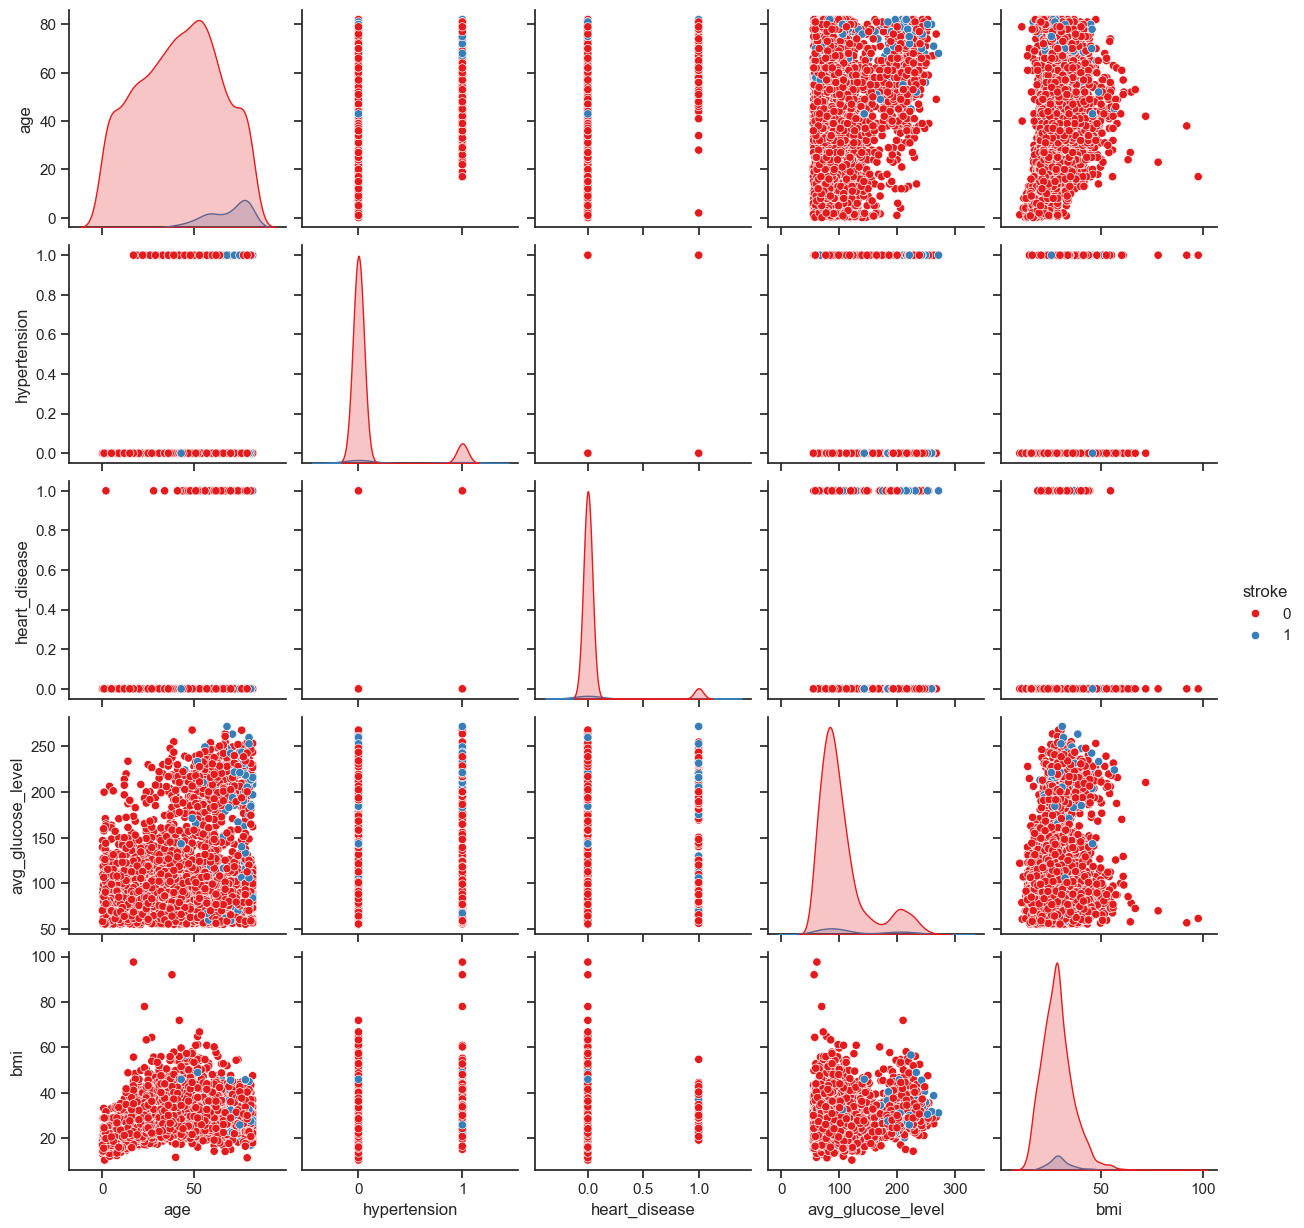

In [36]:
sns.pairplot(train_data, hue="stroke")
plt.show()

As we could see we could not find any outliers that can impact our model because mostly of the data its accumulated in the same place.

# Conclusions

- **Age and Stroke:** The data suggests a possible correlation between age and stroke incidence, with higher rates occurring in individuals above 40. However, it's crucial to explore this relationship further using statistical tests to determine the strength and significance of the association. Age might be a confounding variable influencing both stroke risk and marital status. We need to control for age when analyzing the relationship between marital status and stroke.
- **Marital Status and Stroke:** The initial observation suggests a difference in stroke risk between married and non-married individuals. However, it's important to consider confounding factors like socioeconomic status or health behaviors that might explain this difference. Further analysis is needed to isolate the true effect of marital status on stroke risk.
- **KDE Plot and Age:** The KDE plot visually highlights the potential age distribution difference between those with and without stroke history. Statistical tests can quantify this difference and assess its significance.
- **Heatmap and Variable Correlation:** The heatmap suggests a lack of strong correlations between most variables. However, it's important to use appropriate statistical measures (e.g., correlation coefficients) to confirm this observation and explore potential non-linear relationships between variables.
- **Age and Marital Status:*** The initial observation suggests a connection between age and marital status. This might be due to age being a confounding variable.  Further analysis is needed to understand the independent effects of age and marital status on stroke risk.
- **Glucose Levels and Stroke:** The data indicates a possible link between higher glucose levels and increased stroke risk. However, this observation needs to be confirmed with statistical tests and controlling for other relevant factors like weight or diabetes diagnosis.

Additional Considerations:
Investigate potential interactions between variables. for that we will be analysing them using statistical analysis to see if we could get more insights about the sample that we already had.